In [1]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [2]:
!ls

drive  sample_data


**Implementing Artificial Neural Network(Classification) in Python From Scratch**

###Artificial Neural Networks(ANN) are part of supervised machine learning where we will be having input as well as corresponding output present in our dataset. Our whole aim is to figure out a way of mapping this input to the respective output. ANN can be used for solving both regression and classification problems.

##Here we are dealing with a dataset from the finance domain. We have a dataset where we are having 14 dimensions in total and 100000 records.

As we can see from the above data dictionary, we are dealing with a total of 14 dimensions.

Here our main goal is to create an artificial neural network that will take into consideration all independent variables(first 13) and based on that will predict if our customer is going to exit the bank or not(Exited is dependent variable here).

Once we understand the steps for constructing neural networks, we can directly implement those same steps to other datasets as well.

One of the ways where we can find such datasets is the UCI machine learning repository. These datasets are classified into regression and classification problems. Since we are implementing this neural network to solve classification problems, you can download any classification dataset from there and can apply the same steps on any dataset of your choice !. How cool is that?

In [3]:
#Importing necessary Libraries
import numpy as np
import pandas as pd
import tensorflow as tf

In [5]:
#Loading Dataset
data = pd.read_csv("/content/drive/MyDrive/Churn_Modelling.csv")
data.head(2)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0


**Generating Matrix of Features (X)**

The basic principle while creating a machine learning model is to generate X also called as Matrix of Features. This X basically contains all our independent variables.

In [6]:
X = data.iloc[:,3:-1].values
X

array([[619, 'France', 'Female', ..., 1, 1, 101348.88],
       [608, 'Spain', 'Female', ..., 0, 1, 112542.58],
       [502, 'France', 'Female', ..., 1, 0, 113931.57],
       ...,
       [709, 'France', 'Female', ..., 0, 1, 42085.58],
       [772, 'Germany', 'Male', ..., 1, 0, 92888.52],
       [792, 'France', 'Female', ..., 1, 0, 38190.78]], dtype=object)

**Generating Dependent Variable Vector(Y)**

In the same fashion where we have created our matrix of features(X) for the independent variable, we also have to create a dependent variable vector(Y) which will only contain our dependent variable values.

In [7]:
#Generating Dependent Variable Vectors
Y = data.iloc[:,-1].values
Y

array([1, 0, 1, ..., 1, 1, 0])

**Encoding Categorical Variable Gender**

Now we have defined our X and Y, from this point on we are going to start with one of the highly time-consuming phases in any machine learning problem-solving. This phase is known as feature engineering. To define it in a simple manner, feature engineering is a phase where we either generate new variables from existing ones or modify existing variables so as to use them in our machine learning model.

In the above image depicting the structure of the dataset, we can see that most of the variables are numeric in nature with exception of a few – Gender, Country. Essentially, a machine learning model is a mathematical formula that is only going to accept digits as input. So we try to create an ML model using this dataset which contains a mix of data( numeric + string), our model will simply fail during the creation process itself. Hence we need to convert those string values into their numerical equivalent without losing their significance.

One of the most efficient ways of doing this is by using a technique called encoding. It is a process that will convert strings or categories directly into their numerical equivalent without losing significance.

Here our gender column has only 2 categories which are male and female, we are going to use LabelEncoding. This type of encoding will simply convert this column into a column having values of 0 and 1. In order to use Label Encoding, we are going to use LabelEncoder class from sklearn library.

##Here we have applied label encoding on the Gender column of our dataset.

In [8]:
#Encoding Categorical Variable Gender
from sklearn.preprocessing import LabelEncoder
LE1 = LabelEncoder()
X[:,2] = np.array(LE1.fit_transform(X[:,2]))
X

array([[619, 'France', 0, ..., 1, 1, 101348.88],
       [608, 'Spain', 0, ..., 0, 1, 112542.58],
       [502, 'France', 0, ..., 1, 0, 113931.57],
       ...,
       [709, 'France', 0, ..., 0, 1, 42085.58],
       [772, 'Germany', 1, ..., 1, 0, 92888.52],
       [792, 'France', 0, ..., 1, 0, 38190.78]], dtype=object)

**Encoding Categorical Variable Country**

Now let’s deal with another categorical column named country. This column has a cardinality of 3 meaning that it has 3 distinct categories present i.e France, Germany, Spain.

Here we have 2 options:-

1. We can use Label Encoding here and directly convert those values into 0,1,2 like that

2. We can use One Hot Encoding here which will convert those strings into a binary vector stream. For example – Spain will be encoded as 001, France will be 010, etc.

The first approach is easy and faster to implement. However, once those values are encoded, those will be converted into 0,1,2. However, there does exist another method of encoding known as one-hot encoding. In one hot encoding, all the string values are converted into binary streams of 0’s and 1’s. One-hot encoding ensures that the machine learning algorithm does not assume that higher numbers are more important.

###Here we have used OneHotEncoder class from sklearn in order to perform one-hot encoding. Now you might have a query here. What is the use of ColumnTransformer? Well, ColumnTransformer is another class in sklearn that will allow us to select a particular column from our dataset on which we can apply one-hot encoding.

In [9]:
#Encoding Categorical variable Geography
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct =ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[1])],remainder="passthrough")  # [1] is 2nd column to transform
X = np.array(ct.fit_transform(X))
X

array([[1.0, 0.0, 0.0, ..., 1, 1, 101348.88],
       [0.0, 0.0, 1.0, ..., 0, 1, 112542.58],
       [1.0, 0.0, 0.0, ..., 1, 0, 113931.57],
       ...,
       [1.0, 0.0, 0.0, ..., 0, 1, 42085.58],
       [0.0, 1.0, 0.0, ..., 1, 0, 92888.52],
       [1.0, 0.0, 0.0, ..., 1, 0, 38190.78]], dtype=object)

**Splitting Dataset into Training and Testing Dataset**

In this step, we are going to split our dataset into training and testing datasets. This is one of the bedrocks of the entire machine learning process. The training dataset is the one on which our model is going to train while the testing dataset is the one on which we are going to test the performance of our model.

###Here we have used the train_test_split function from the sklearn library. We have split our dataset in a configuration such that 80 percent of data will be there in the training phase and 20 percent of data will be in the testing phase.

###Additionally, the best part about using the train_test_split function from sklearn is that, while splitting it will also be performing data shuffling in order to create a more generalized dataset.

In [10]:
#Splitting dataset into training and testing dataset
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=0)
X_train.shape

(8000, 12)

In [11]:
Y_train.shape

(8000,)

In [12]:
X_test.shape

(2000, 12)

In [13]:
Y_test.shape

(2000,)

In [14]:
X_train

array([[0.0, 0.0, 1.0, ..., 1, 0, 163830.64],
       [0.0, 1.0, 0.0, ..., 1, 1, 57098.0],
       [1.0, 0.0, 0.0, ..., 1, 0, 185630.76],
       ...,
       [1.0, 0.0, 0.0, ..., 1, 0, 181429.87],
       [0.0, 0.0, 1.0, ..., 1, 1, 148750.16],
       [0.0, 1.0, 0.0, ..., 1, 0, 118855.26]], dtype=object)

In [15]:
X_test

array([[0.0, 1.0, 0.0, ..., 1, 1, 192852.67],
       [1.0, 0.0, 0.0, ..., 1, 0, 128702.1],
       [0.0, 0.0, 1.0, ..., 1, 1, 75732.25],
       ...,
       [0.0, 0.0, 1.0, ..., 1, 0, 141533.19],
       [0.0, 1.0, 0.0, ..., 1, 1, 11276.48],
       [0.0, 1.0, 0.0, ..., 1, 0, 192950.6]], dtype=object)

**Performing Feature Scaling**

The very last step in our feature engineering phase is feature scaling. It is a procedure where all the variables are converted into the same scale. Why you might ask?. Sometimes in our dataset, certain variables have very high values while certain variables have very low values. So there is a chance that during model creation, the variables having extremely high-value dominate variables having extremely low value. Because of this, there is a possibility that those variables with the low value might be neglected by our model, and hence feature scaling is necessary.

Now here I am going to answer one of the most important questions asked in a machine learning interview. ” ***When to perform feature scaling – before the train-test split or after the train-test split?”.***

##Well, the answer is after we split the dataset into training and testing datasets. The reason being, the training dataset is something on which our model is going to train or learned itself. While the testing dataset is something on which our model is going to be evaluated. If we perform feature scaling before the train-test split then it will cause information leakage on testing datasets which neglects the purpose of having a testing dataset and hence we should always perform feature scaling after the train-test split.

Now how we are going to perform feature scaling? Well, there are many ways of performing feature scaling. The two most efficient techniques in the context are:-

1. Standardization

2. Normalization

Whenever standardization is performed, all values in the dataset will be converted into values ranging between -3 to +3. While in the case of normalization, all values will be converted into a range between -1 to +1.

There are few conditions on which technique to use and when. Usually, Normalization is used only when our dataset follows a normal distribution while standardization is a universal technique that can be used for any dataset irrespective of the distribution. Here we are going to use Standardization.

Here we have used StandardScalar class from the sklearn library in order to perform standardization.

Now we have completed our feature engineering phase. We can now start with the creation of our artificial neural network from the next point onwards.

In [16]:
#Performing Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

X_train

array([[-1.01460667, -0.5698444 ,  1.74309049, ...,  0.64259497,
        -1.03227043,  1.10643166],
       [-1.01460667,  1.75486502, -0.57369368, ...,  0.64259497,
         0.9687384 , -0.74866447],
       [ 0.98560362, -0.5698444 , -0.57369368, ...,  0.64259497,
        -1.03227043,  1.48533467],
       ...,
       [ 0.98560362, -0.5698444 , -0.57369368, ...,  0.64259497,
        -1.03227043,  1.41231994],
       [-1.01460667, -0.5698444 ,  1.74309049, ...,  0.64259497,
         0.9687384 ,  0.84432121],
       [-1.01460667,  1.75486502, -0.57369368, ...,  0.64259497,
        -1.03227043,  0.32472465]])

In [17]:
X_test

array([[-1.01460667,  1.75486502, -0.57369368, ...,  0.64259497,
         0.9687384 ,  1.61085707],
       [ 0.98560362, -0.5698444 , -0.57369368, ...,  0.64259497,
        -1.03227043,  0.49587037],
       [-1.01460667, -0.5698444 ,  1.74309049, ...,  0.64259497,
         0.9687384 , -0.42478674],
       ...,
       [-1.01460667, -0.5698444 ,  1.74309049, ...,  0.64259497,
        -1.03227043,  0.71888467],
       [-1.01460667,  1.75486502, -0.57369368, ...,  0.64259497,
         0.9687384 , -1.54507805],
       [-1.01460667,  1.75486502, -0.57369368, ...,  0.64259497,
        -1.03227043,  1.61255917]])

**Initializing Artificial Neural Network**

This is the very first step while creating ANN. Here we are going to create our ann object by using a certain class of Keras named Sequential.

As a part of tensorflow 2.0, Keras is now integrated with tensorflow and is now considered as a sub-library of tensorflow. The Sequential class is a part of the models module of Keras library which is a part of the tensorflow library now.

In [18]:
#Initialising ANN
ann = tf.keras.models.Sequential()
ann

**Creating Hidden Layers**

Once we initialize our ann, we are now going to create layers for the same. Here we are going to create a network that will have 2 hidden layers, 1 input layer, and 1 output layer. So, let’s create our very first hidden layer.

Here we have created our first hidden layer by using the Dense class which is part of the layers module. This class accepts 2 inputs:-

1. units:- number of neurons that will be present in the respective layer

2. activation:- specify which activation function to be used

For the first input, I had tested with many values in the past and the optimal value that I had found is 6. Obviously, we can try with any other value as there is no hard rule about the number of neurons that should be present in the layer.

For the second input, we are always going to use “relu”[rectified linear unit] as an activation function for hidden layers. Since we are going to create two hidden layers, this same step we are going to repeat for the creation of the second hidden layer as well.

In [19]:
#Adding First Hidden Layer
ann.add(tf.keras.layers.Dense(units=6,activation="relu"))

In [20]:
#Adding Second Hidden Layer
ann.add(tf.keras.layers.Dense(units=6,activation="relu"))

**Creating Output Layer**

In this step, we are going to create our output layer for ann. The output layer will be responsible for giving output.

Here again, we are going to use the Dense class in order to create the output layer. Two important things to remember here:-

1. In a binary classification problem(like this one) where we will be having only two classes as output (1 and 0), we will be allocating only one neuron to output this result. For the multiclass classification problem, we have to use more than one neuron in the output layer. For example – if our output contains 4 categories then we need to create 4 different neurons[one for each category].

2. For the binary classification Problems, the activation function that should always be used is sigmoid. For a multiclass classification problem, the activation function that should be used is softmax.

###Here since we are dealing with binary classification hence we are allocating only one neuron in the output layer and the activation function which is used is softmax.

In [24]:
#Adding Output Layer
ann.add(tf.keras.layers.Dense(units=1,activation="sigmoid"))

In [38]:
ann.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 78        
                                                                 
 dense_1 (Dense)             (None, 6)                 42        
                                                                 
 dense_2 (Dense)             (None, 1)                 7         
                                                                 
 dense_3 (Dense)             (None, 1)                 2         
                                                                 
Total params: 129 (516.00 Byte)
Trainable params: 129 (516.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


**Compiling Artificial Neural Network**

We have now created layers for our neural network. In this step, we are going to compile our ANN.

We have used compile method of our ann object in order to compile our network. Compile method accepts the below inputs:-

1. optimizer:- specifies which optimizer to be used in order to perform stochastic gradient descent. I had experimented with various optimizers like RMSProp, adam and I have found that adam optimizer is a reliable one that can be used with any neural network.

2. loss:- specifies which loss function should be used. For binary classification, the value should be binary_crossentropy. For multiclass classification, it should be categorical_crossentropy.

3. metrics:- which performance metrics to be used in order to compute performance. Here we have used accuracy as a performance metric.

In [28]:
#Compiling ANN
ann.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])

**Fitting Artificial Neural Network**

This is the last step in our ann creation process. Here we are just going to train our ann on the training dataset.

Here we have used the fit method in order to train our ann. The fit method is accepting 4 inputs in this case:-

1.X_train:- Matrix of features for the training dataset

2.Y_train:- Dependent variable vectors for the training dataset

3.batch_size: how many observations should be there in the batch. Usually, the value for this parameter is 32 but we can experiment with any other value as well.

4. epochs: How many times neural networks will be trained. Here the optimal value that I have found from my experience is 100.


Here we can see that in each epoch our loss is decreasing and our accuracy is increasing. As we can see here that our final accuracy is 86.59 which is pretty remarkable for a neural network with this simplicity.

That’s it :). We have created our artificial neural network from scratch using Python.

As an additional bonus, I am attaching the code below that will allow us to perform single-point prediction for any custom values of input.

In [52]:
#Fitting ANN
epochs_hist = ann.fit(X_train,Y_train,batch_size=32,epochs = 100, validation_data=(X_test, Y_test))

Epoch 1/100
250/250 [==============================] - 2s 6ms/step - loss: 0.3332 - accuracy: 0.8643 - val_loss: 0.3393 - val_accuracy: 0.8580
Epoch 2/100
250/250 [==============================] - 1s 6ms/step - loss: 0.3329 - accuracy: 0.8652 - val_loss: 0.3409 - val_accuracy: 0.8575
Epoch 3/100
250/250 [==============================] - 1s 6ms/step - loss: 0.3324 - accuracy: 0.8659 - val_loss: 0.3390 - val_accuracy: 0.8575
Epoch 4/100
250/250 [==============================] - 4s 15ms/step - loss: 0.3330 - accuracy: 0.8649 - val_loss: 0.3398 - val_accuracy: 0.8585
Epoch 5/100
250/250 [==============================] - 2s 9ms/step - loss: 0.3323 - accuracy: 0.8640 - val_loss: 0.3397 - val_accuracy: 0.8570
Epoch 6/100
250/250 [==============================] - 1s 6ms/step - loss: 0.3325 - accuracy: 0.8671 - val_loss: 0.3423 - val_accuracy: 0.8585
Epoch 7/100
250/250 [==============================] - 1s 5ms/step - loss: 0.3327 - accuracy: 0.8646 - val_loss: 0.3390 - val_accuracy: 0.858

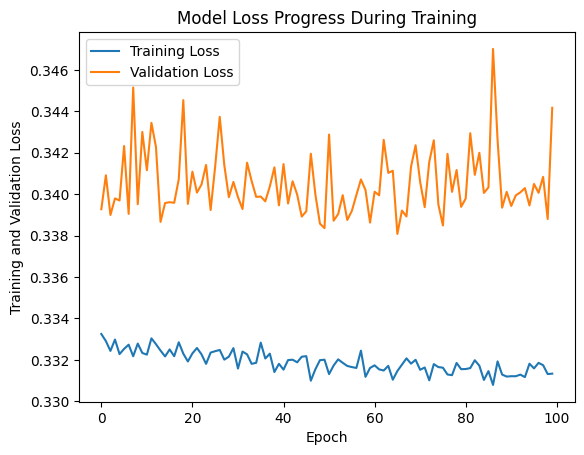

In [53]:
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training and Validation Loss')
plt.legend(['Training Loss', 'Validation Loss']);

In [54]:
result = ann.evaluate(X_test, Y_test)
result

print("Accuracy Percentage : {}".format(result[1] * 100))

63/63 [==============================] - 0s 2ms/step - loss: 0.3442 - accuracy: 0.8535
Accuracy Percentage : 85.35000085830688


63/63 [==============================] - 0s 2ms/step


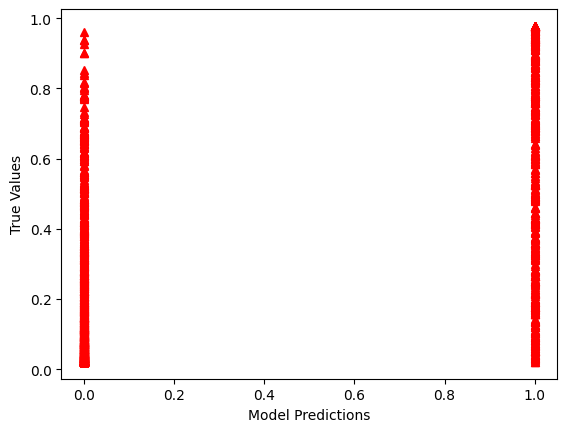

In [55]:
Y_predict = ann.predict(X_test)
plt.plot(Y_test, Y_predict, "^", color = 'r')
plt.xlabel('Model Predictions')
plt.ylabel('True Values');

**Predicting Result for Single Point Observation**

Here our neural network is trying to predict whether our customer is going to exit or not based on the values of independent variables

In [30]:
X.shape

(10000, 12)

In [31]:
data.head(1)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.0,1,1,1,101348.88,1


In [32]:
#Predicting result for Single Observation
print(ann.predict(sc.transform([[1, 0, 0, 600, 1, 40, 3, 60000, 2, 1, 1,50000]])) > 0.5)

1/1 [==============================] - 0s 137ms/step
[[False]]


###how can you save your created neural network.

#Saving created neural network
ann.save("ANN.h5")
That’s it. Using this one line of code allows us to save our ML model. You might have a query here?

What is the h5 file format? Well, h5 is a specific file format used by neural networks. Using this format we can directly save our neural network as a serialized object. It is similar to the pickle file format implementation that we use for storing traditional machine learning models.

In [33]:
#Saving created neural network
ann.save("ANN.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [34]:
data.head(1)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.0,1,1,1,101348.88,1


In [35]:
import seaborn as sns
corr = data.corr()
corr

<ipython-input-35-56f1ad65cae7>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000000,0.004202,0.005840,0.000783,-0.006495,-0.009067,0.007246,0.000599,0.012044,-0.005988,-0.016571
CustomerId,0.004202,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
CreditScore,0.005840,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,0.000783,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.006495,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,-0.009067,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.007246,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,0.000599,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.012044,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.005988,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


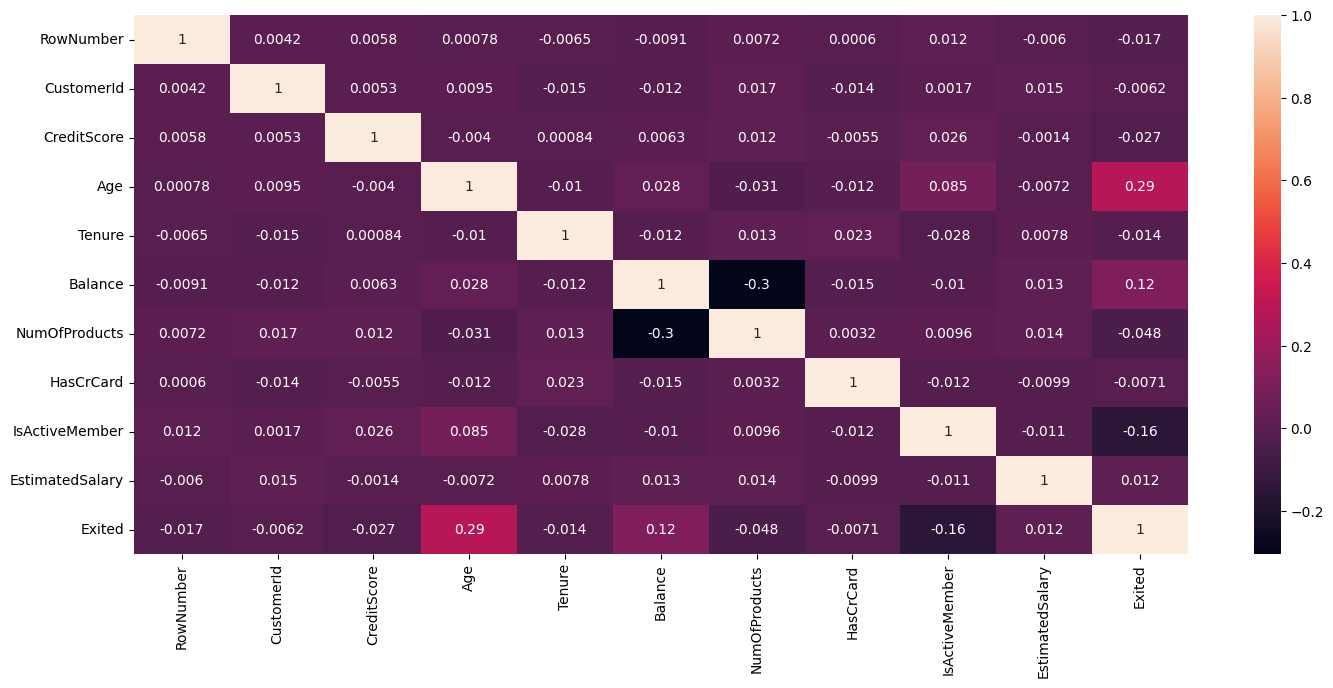

In [37]:
import matplotlib.pyplot as plt

plt.figure(figsize=(17,7))
sns.heatmap(corr, annot=True)
plt.show();